In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve

In [4]:
df=pd.read_csv(r"F:\House Prediction\DataSets\data.csv")

In [5]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [7]:
df2=df.drop(['street','date','country','statezip','city','condition','yr_built','yr_renovated','sqft_lot'],axis=1)


In [8]:
def remove_outliers_iqr_all_columns(dataframe, k=1.5):
    # Identify numeric columns
    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    
    # Iterate through numeric columns
    for column in numeric_columns:
        # Calculate Q1, Q3, and IQR
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR
        
        outliers = (dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)
        dataframe = dataframe[~outliers]
    
    return dataframe

df_no = remove_outliers_iqr_all_columns(df2)

In [9]:
df_no['price_per_sqft']=df_no['price']/df_no['sqft_living']

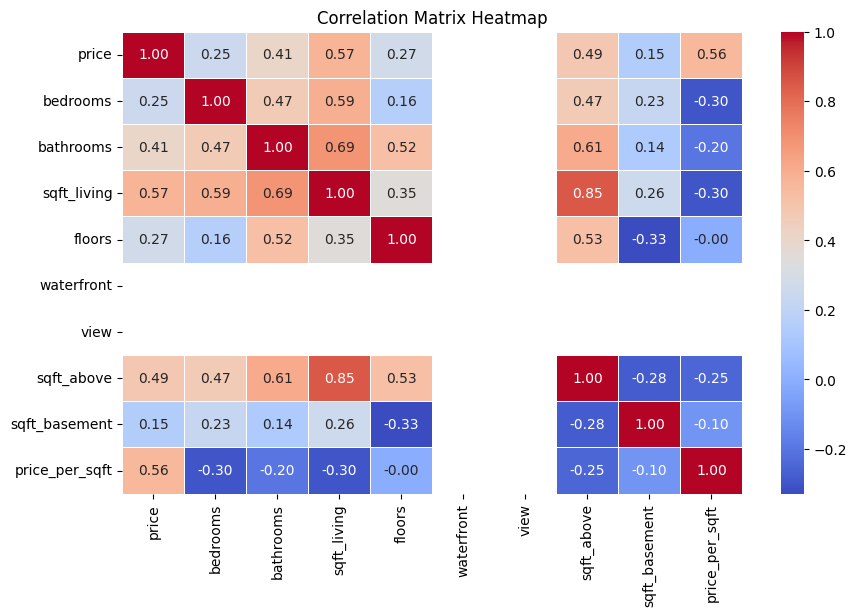

In [10]:
correlation_matrix=df_no.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
#remove sqft lot because it doesn't corralate with price , year bulit , year renovated , condition

In [11]:
X=df_no.drop(['price'],axis=1).values
y=df_no['price'].values

In [12]:
df_no.shape

(3726, 10)

In [13]:
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Choose a range of k values
k_values = list(range(1, 21))

# Step 3-5: Train, Evaluate, and Select the Best k
best_k = None
best_mse = float('inf')

for k in k_values:
    knn1 = KNeighborsRegressor(n_neighbors=k,metric='euclidean')
    knn1.fit(X_train_k, y_train_k)
    y_pred = knn1.predict(X_test_k)
    mse = mean_squared_error(y_test_k, y_pred)

    if mse < best_mse:
        best_mse = mse
        best_k = k

print("Best k:", best_k)

Best k: 2


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
knn = KNeighborsRegressor(best_k,metric='euclidean')

In [16]:
knn.fit(X_train,y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=2)

In [17]:
y_pred=knn.predict(X_test)

In [18]:
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(knn, X, y, scoring='r2', cv=kf)

for i, score in enumerate(cross_val_scores):
    print(f'Fold {i + 1}: R-squared = {score:.4f}')


average_score = np.mean(cross_val_scores)
print(f'Average R-squared across all folds: {average_score:.4f}')


test_r2 = r2_score(y_test, y_pred)
print(f'R-squared on the test set: {test_r2:.4f}')

Fold 1: R-squared = 0.9269
Fold 2: R-squared = 0.9295
Fold 3: R-squared = 0.9320
Fold 4: R-squared = 0.9401
Fold 5: R-squared = 0.9232
Average R-squared across all folds: 0.9303
R-squared on the test set: 0.9269


In [19]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error is Equal to {mse}")
print(f"Mean Average Error is Equal to {mae}")
print(f"Root Mean Squared Error is Equal to {mse**(1/2)}")

Mean Squared Error is Equal to 2871476317.428488
Mean Average Error is Equal to 29494.60698710456
Root Mean Squared Error is Equal to 53586.15789015376


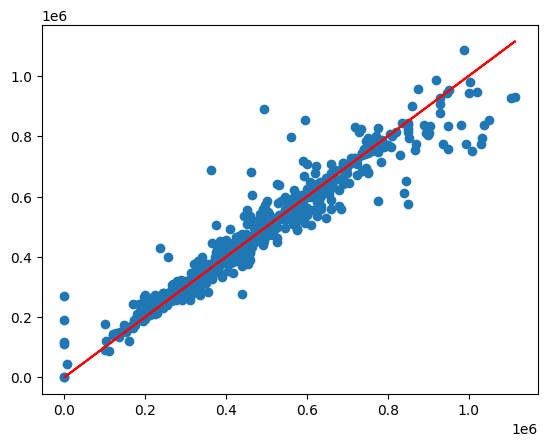

In [20]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,color='r')
plt.show()

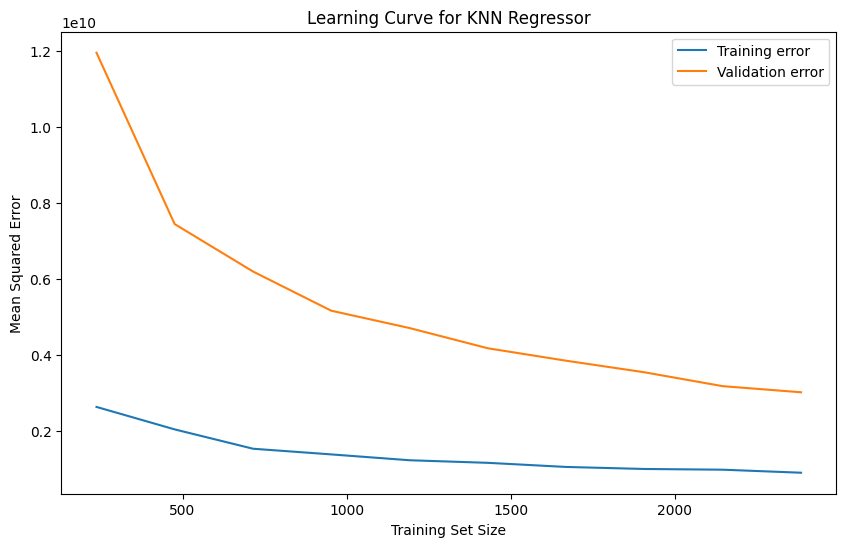

In [21]:
train_sizes, train_scores, val_scores = learning_curve(
    knn, X_train, y_train, cv=kf,
    scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)
train_scores_mean = -np.mean(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, val_scores_mean, label='Validation error')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve for KNN Regressor')
plt.legend()
plt.show()

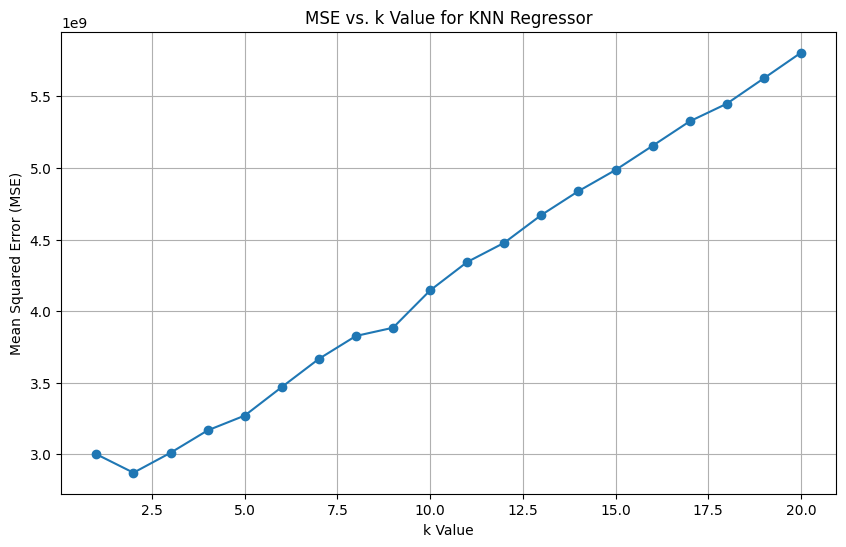

In [22]:
#we want to minimize mean squared error 
k_values = range(1, 21)
mse_values = []
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-')
plt.title('MSE vs. k Value for KNN Regressor')
plt.xlabel('k Value')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()